In [1]:
import numpy as np
import pandas as pd
tf.
df = pd.read_csv("dataset/pima-indians-diabetes.csv", names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI",
                                                               "pedigree", "age", "class"])

In [3]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df[["pregnant", "class"]].head()

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1


In [14]:
df[['pregnant', 'class']].groupby(["pregnant"], as_index = False).mean().sort_values(by = 'pregnant', ascending = True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

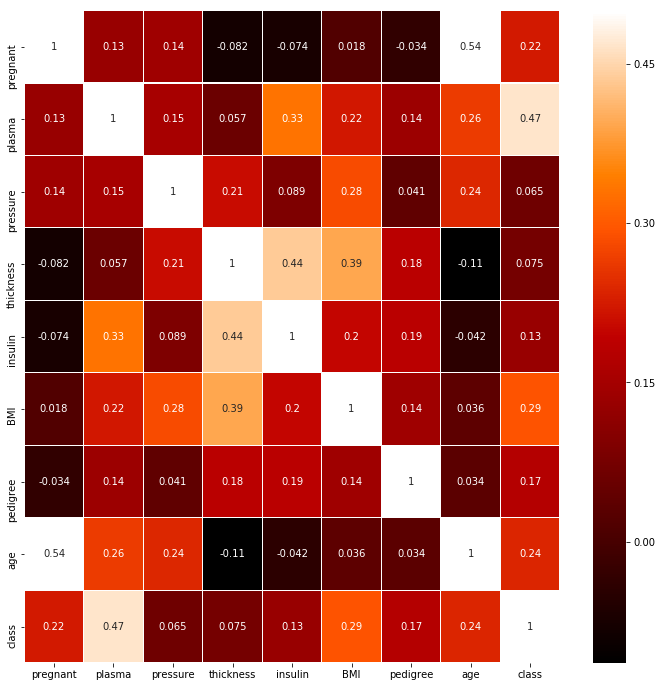

In [16]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), linewidths = 0.1, vmax = 0.5, cmap = plt.cm.gist_heat, linecolor = 'white', annot = True)

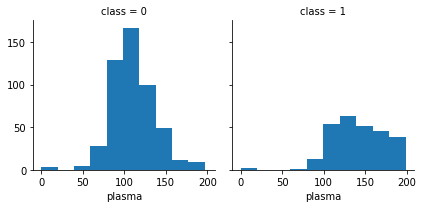

In [17]:
grid = sns.FacetGrid(df, col = 'class')
grid.map(plt.hist, 'plasma', bins = 10)
plt.show()

In [19]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

Using TensorFlow backend.


In [20]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [22]:
dataset = np.loadtxt("dataset/pima-indians-diabetes.csv", delimiter = ",")
X = dataset[:, 0:8]
Y = dataset[:, 8]

In [23]:
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

W0809 11:43:20.131303   364 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 11:43:20.134304   364 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 11:43:20.138304   364 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0809 11:43:20.184306   364 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0809 11:43:20.205307   364 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:

In [24]:
model.fit(X,Y, epochs = 200, batch_size = 10)

W0809 11:43:46.098789   364 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/200
768/768 [==============================] - 0s 340us/step - loss: 2.4386 - acc: 0.5169
Epoch 2/200
768/768 [==============================] - 0s 70us/step - loss: 0.9143 - acc: 0.6393
Epoch 3/200
768/768 [==============================] - 0s 70us/step - loss: 0.7940 - acc: 0.6393
Epoch 4/200
768/768 [==============================] - 0s 74us/step - loss: 0.7409 - acc: 0.6068
Epoch 5/200
768/768 [==============================] - 0s 69us/step - loss: 0.6791 - acc: 0.6432
Epoch 6/200
768/768 [==============================] - 0s 70us/step - loss: 0.6498 - acc: 0.6263
Epoch 7/200
768/768 [==============================] - 0s 74us/step - loss: 0.6376 - acc: 0.6471
Epoch 8/200
768/768 [==============================] - 0s 74us/step - loss: 0.6379 - acc: 0.6341
Epoch 9/200
768/768 [==============================] - 0s 78us/step - loss: 0.6288 - acc: 0.6445
Epoch 10/200
768/768 [==============================] - 0s 96us/step - loss: 0.6214 - acc: 0.6523
Epoch 11/200
768/768 [======

768/768 [==============================] - 0s 72us/step - loss: 0.5078 - acc: 0.7448
Epoch 85/200
768/768 [==============================] - 0s 73us/step - loss: 0.5068 - acc: 0.7435
Epoch 86/200
768/768 [==============================] - 0s 74us/step - loss: 0.5122 - acc: 0.7539
Epoch 87/200
768/768 [==============================] - 0s 72us/step - loss: 0.5114 - acc: 0.7487
Epoch 88/200
768/768 [==============================] - 0s 74us/step - loss: 0.5139 - acc: 0.7331
Epoch 89/200
768/768 [==============================] - 0s 69us/step - loss: 0.5069 - acc: 0.7565
Epoch 90/200
768/768 [==============================] - 0s 72us/step - loss: 0.5026 - acc: 0.7513
Epoch 91/200
768/768 [==============================] - 0s 70us/step - loss: 0.5003 - acc: 0.7617
Epoch 92/200
768/768 [==============================] - 0s 73us/step - loss: 0.5099 - acc: 0.7357
Epoch 93/200
768/768 [==============================] - 0s 74us/step - loss: 0.5032 - acc: 0.7552
Epoch 94/200
768/768 [===========

768/768 [==============================] - 0s 73us/step - loss: 0.4757 - acc: 0.7513
Epoch 168/200
768/768 [==============================] - 0s 69us/step - loss: 0.4699 - acc: 0.7708
Epoch 169/200
768/768 [==============================] - 0s 70us/step - loss: 0.4741 - acc: 0.7747
Epoch 170/200
768/768 [==============================] - 0s 70us/step - loss: 0.4711 - acc: 0.7734
Epoch 171/200
768/768 [==============================] - 0s 69us/step - loss: 0.4723 - acc: 0.7656
Epoch 172/200
768/768 [==============================] - 0s 69us/step - loss: 0.4713 - acc: 0.7591
Epoch 173/200
768/768 [==============================] - 0s 72us/step - loss: 0.4743 - acc: 0.7721
Epoch 174/200
768/768 [==============================] - 0s 69us/step - loss: 0.4703 - acc: 0.7747
Epoch 175/200
768/768 [==============================] - 0s 70us/step - loss: 0.4726 - acc: 0.7578
Epoch 176/200
768/768 [==============================] - 0s 74us/step - loss: 0.4685 - acc: 0.7643
Epoch 177/200
768/768 [=

In [28]:
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

768/768 [==============================] - 0s 27us/step

 Accuracy: 0.7799
